# Doğrusal Regresyon ile Satış Tahmini

In [1]:
# Bilimsel hesaplamalar için NumPy kütüphanesini ekleyin
import numpy as np

# Veri analizi için Pandas kütüphanesini ekleyin
import pandas as pd

# Grafik çizimleri için Matplotlib kütüphanesini ekleyin
import matplotlib.pyplot as plt

# Veri görselleştirmesi için Seaborn kütüphanesini ekleyin
import seaborn as sns

# Pandas'ta ondalık sayı formatını ayarlayın
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Sci-kit Learn kütüphanesinden doğrusal regresyon modelini ekleyin
from sklearn.linear_model import LinearRegression

# Model performansını değerlendirmek için hata metriklerini ekleyin
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Veri setini eğitim ve test setlerine bölmek ve çapraz doğrulama için gerekli fonksiyonları ekleyin
from sklearn.model_selection import train_test_split, cross_val_score


## Scikit-Learn Kullanarak OLS ile Basit Doğrusal Regresyon

In [2]:
# CSV dosyasını okuyarak bir DataFrame oluşturun
df = pd.read_csv("datasets/advertising.csv")

# DataFrame'in boyutlarını gösterin
df.shape

(200, 4)

In [28]:
df.describe()

,TV,radio,newspaper,sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.97,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


DataFrame içerisinde 3 bağımsız ve 1 bağımlı değişken bulunmaktadır. Biz öncelikle basit doğrusal regresyon kuracağımız için
sadece bir bağımsız ve bağımlı değişken kullanarak model oluşturacağız. Bunun için bağımsız değişken olarak "**TV**" sütununu seçeceğiz.

In [3]:
# Bağımsız değişken (X) olarak "TV" sütununu seçin
X = df[["TV"]]

# Bağımlı değişken (y) olarak "sales" sütununu seçin
y = df[["sales"]]

## Model


In [4]:
# Doğrusal regresyon modelini oluşturun ve eğitin
reg_model = LinearRegression().fit(X, y)

# y_hat = b + w*TV
# sabit (b - bias)
# reg_model.intercept_[0] ifadesi, modelin sabit (b - bias) terimini temsil eder.
# Bu, regresyon doğrusunun y-ekseniyle kesişim noktasını ifade eder.
reg_model.intercept_[0]


7.032593549127693

In [5]:
# reg_model.coef_[0][0] ifadesi, modelin bağımsız değişken (TV) katsayısını temsil eder.
# Bu, regresyon denkleminde TV'nin katsayısını ifade eder.
reg_model.coef_[0][0]


0.047536640433019764

## Tahmin

In [6]:
# 150 birimlik TV harcaması için satış tahminini yapın
sales_prediction_150 = reg_model.intercept_[0] + reg_model.coef_[0][0] * 150

# 500 birimlik TV harcaması için satış tahminini yapın
sales_prediction_500 = reg_model.intercept_[0] + reg_model.coef_[0][0] * 500

# DataFrame'in özet istatistiklerini gösterin
df.describe().T


,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
sales,200.00,14.02,5.22,1.60,10.38,12.90,17.40,27.00


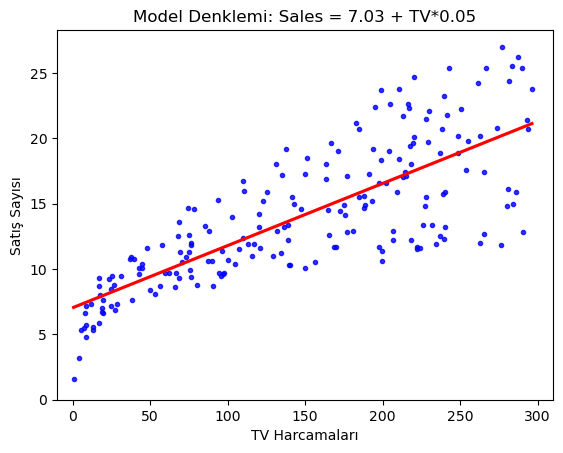

In [8]:
# Seaborn ile regresyon doğrusunu görselleştirin
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

# Grafiğin başlığını ve eksen etiketlerini ayarlayın
g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")

# Grafiği daha iyi göstermek için x ve y eksenlerini sınırlayın
plt.xlim(-10, 310)
plt.ylim(bottom=0)

# Grafiği gösterin
plt.show()


## Tahmin Başarısı

In [11]:
# Regresyon modeli ile yapılan tahminleri alın
y_pred = reg_model.predict(X)

# Ortalama Kare Hata (MSE) hesaplayın
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Gerçek satışların ortalamasını alın
# Burada, values[0] ifadesi, Pandas Serisi'nin içindeki değerlere erişmeyi sağlar. 
mean_sales = y.mean().values[0]
print(f"Gerçek Satış Ortalaması: {mean_sales:.2f}")

# Gerçek satışların standart sapmasını alın
std_sales = y.std().values[0]
print(f"Gerçek Satış Standart Sapması: {std_sales:.2f}")

# Karekök Ortalama Kare Hata (RMSE) hesaplayın
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Ortalama Mutlak Hata (MAE) hesaplayın
mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# R-Kare (Belirleme Katsayısı) hesaplayın
r_squared = reg_model.score(X, y)
print(f"R-Squared: {r_squared:.2f}")


Mean Squared Error (MSE): 10.51
Gerçek Satış Ortalaması: 14.02
Gerçek Satış Standart Sapması: 5.22
Root Mean Squared Error (RMSE): 3.24
Mean Absolute Error (MAE): 2.55
R-Squared: 0.61


Burada yapabileceğimiz yorum şu şekilde olacaktır. 

Gerçek satışların ortalamasına baktığımızda **14,02** olduğunu görmekteyiz.

Standart sapması ise **5,22** olarak hesaplanmış. 

Bu durumda tahmin edilecek değerler ortalamadan standart sapma kadar yukarıda (14,02+5,22 = 19,24 ) veya aşağıda (14,02-5,22=8,8) olabilir. 

Fakat MSE değerine baktığımızda hata **10,51** oldukça fazla olduğunu görüyoruz. Yani kabul edilebilir bir hata değil

R kare değeri regresyon modelinin başarısı için oldukça önemli bir parametredir. Bağımsız değişkenlerin bağımlı değişkeni açıklama yüzdesidir. Bu modelde bağımsız değişkenlerin bağımlı değişkeni açıklama yüzdesi %61'dir.


## Multiple Linear Regression

In [12]:
# "advertising.csv" dosyasını okuyarak bir DataFrame oluşturun
df = pd.read_csv("datasets/advertising.csv")

# Bağımsız değişkenleri (X) seçin: 'sales' sütununu hariç tutun
X = df.drop('sales', axis=1)

# Bağımlı değişkeni (y) seçin: 'sales' sütununu alın
y = df[["sales"]]


## Model

Bu kodlar, veriyi eğitim ve test setlerine böler (train-test split), doğrusal regresyon modelini eğitir ve modelin katsayılarını (sabit ve ağırlıklar) alır.

In [14]:
# Veriyi eğitim ve test setlerine bölen fonksiyonu kullanarak veriyi bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Test setinin bağımlı değişken (y) boyutunu göster
y_test.shape


(40, 1)

In [15]:
# Eğitim setinin bağımlı değişken (y) boyutunu göster
y_train.shape

(160, 1)

In [29]:
# Test setinin bağımsız değişken (x) boyutunu göster
X_test.shape

(40, 3)

In [30]:
# Eğitim setinin bağımsız değişken (x) boyutunu göster
X_train.shape

(160, 3)

In [17]:
# Doğrusal regresyon modelini eğitim seti üzerinde eğitin
reg_model = LinearRegression().fit(X_train, y_train)

# Eğitilmiş modelin sabit (bias) terimini göster
reg_model.intercept_

array([2.90794702])

In [18]:
# Eğitilmiş modelin ağırlıklarını (katsayıları) göster
reg_model.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

## Tahmin

Bu kodlar, verilen bir gözlem seti için eğitilmiş regresyon modelini kullanarak satış tahmini yapar.

## Bu kısım önemli mulakatlarda sorulabilir !!

Model denklemini kurma

In [21]:
# Aşağıdaki gözlem değerlerine göre satışın beklenen değeri nedir?

# TV: 30
# radio: 10
# newspaper: 40

# Yukarıda bulduğumuz değerler;
# 2.90 (reg_model.intercept_ komutu ile bulduğumuz sabitimiz)
# 0.0468431 , 0.17854434, 0.00258619   (reg_model.coef_ komutu ile bulduğumuz ağırlıklarımız)

# Elimizdeki ağırlıkları ve sabiti kullanarak model denklemini yazacak olursak;
# TV, radio ve newspaper için elde edilen ağırlık değerleri ile çarpılıp sabitimiz ile toplanırsa satış tahmini elde edilir.

tahmin = 2.90794702 + 30 * 0.0468431 + 10 * 0.17854434 + 40 * 0.00258619

# Aynı işlemi manuel değil de oluşturduğumuz modele yaptıralım;

# Yeni veriyi oluşturun ve DataFrame'e çevirin
yeni_veri = [[30], [10], [40]]
# veriyi DataFrame çevirerek Transpozunu aldık.
yeni_veri = pd.DataFrame(yeni_veri).T

# Eğitilmiş regresyon modelini kullanarak satış tahminini yapın
tahmin_yeni_veri = reg_model.predict(yeni_veri)

# Sonuçları yazdırın
print(f"Manuel Tahmin:" ,tahmin)
print("Model Tahmini: ", tahmin_yeni_veri)


Manuel Tahmin: 6.20213102
Model Tahmini:  [[6.202131]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Tahmin Başarısını Değerlendirme


In [22]:
# Eğitim seti için RMSE hesapla
train_rmse = np.sqrt(mean_squared_error(y_train, reg_model.predict(X_train)))
print("Train RMSE:", train_rmse)

# Eğitim seti için R-Kare hesapla
train_r_squared = reg_model.score(X_train, y_train)
print("Train R-Squared:", train_r_squared)

# Test seti için RMSE hesapla
test_rmse = np.sqrt(mean_squared_error(y_test, reg_model.predict(X_test)))
print("Test RMSE:", test_rmse)

# Test seti için R-Kare hesapla
test_r_squared = reg_model.score(X_test, y_test)
print("Test R-Squared:", test_r_squared)

# 10 katlı çapraz doğrulama (CV) için RMSE hesapla
cv_10fold_rmse = np.mean(np.sqrt(-cross_val_score(reg_model, X, y, cv=10, scoring="neg_mean_squared_error")))
print("10 Katlı CV RMSE:", cv_10fold_rmse)

# 5 katlı çapraz doğrulama (CV) için RMSE hesapla
cv_5fold_rmse = np.mean(np.sqrt(-cross_val_score(reg_model, X, y, cv=5, scoring="neg_mean_squared_error")))
print("5 Katlı CV RMSE:", cv_5fold_rmse)



Train RMSE: 1.7369025901470923
Train R-Squared: 0.8959372632325174
Test RMSE: 1.4113417558581587
Test R-Squared: 0.8927605914615384
10 Katlı CV RMSE: 1.6913531708051797
5 Katlı CV RMSE: 1.7175247278732086


R kare değerimiz neredeyse %90 civarında bağımsız değişkenlerin bağımlı değişkeni açıklama oranı oldukça yükselmiş. Ayrıca hata oranımız azalmış durumdadır.

Normalde test hatasının (RMSE), eğitimden daha yüksek çıkması beklenir. Fakat bizim modelimizde test hatası daha düşük çıktı. Bu da model için olumlu bir durumdur.

Veri setinin az olduğu durumlarda normal RMSE değeri yerine katlı çapraz doğrulamanın RMSE değerine güvenmek daha doğru olacaktır. Çapraz doğrulama, bir modelin performansını değerlendirmek için veriyi farklı alt kümelerde eğitip test etme yöntemidir. Bu, modelin genelleme yeteneğini daha güvenilir bir şekilde ölçmeye yardımcı olur ve tek bir veri bölümüne bağlı kalmadan performansı değerlendirir.

## Sıfırdan Gradient Descent ile Basit Doğrusal Regresyon

Bu fonksiyon, verilen bir regresyon modelinin katsayıları (sabit b ve ağırlık w), bağımlı değişkeni (Y) ve bağımsız değişkeni (X) kullanarak MSE'yi hesaplar. Bu, modelin ne kadar iyi uyuştuğunu değerlendiren bir maliyet fonksiyonudur.

In [23]:
# Cost function MSE
def cost_function(Y, b, w, X):
    m = len(Y)  # Veri noktalarının sayısı
    sse = 0  # Toplam kare hatası

    for i in range(0, m):
        y_hat = b + w * X[i]  # Tahmini değeri hesapla
        y = Y[i]  # Gerçek değeri al
        sse += (y_hat - y) ** 2  # Hata karesini topla

    mse = sse / m  # Ortalama kare hatasını hesapla
    return mse


Bu fonksiyon, regresyon modelinin ağırlıklarını güncellemek için gradyan iniş algoritmasını kullanır. **learning_rate** parametresi, her iterasyonda ağırlıkların güncellenme miktarını kontrol eder.

In [24]:
# update_weights
def update_weights(Y, b, w, X, learning_rate):
    m = len(Y)  # Veri noktalarının sayısı
    b_deriv_sum = 0  # Sabit (b) türevinin toplamı
    w_deriv_sum = 0  # Ağırlık (w) türevinin toplamı

    for i in range(0, m):
        y_hat = b + w * X[i]  # Tahmini değeri hesapla
        y = Y[i]  # Gerçek değeri al
        b_deriv_sum += (y_hat - y)  # Sabit (b) türevidir
        w_deriv_sum += (y_hat - y) * X[i]  # Ağırlık (w) türevidir

    # Yeni sabit (b) ve ağırlık (w) değerlerini güncelle
    new_b = b - (learning_rate * 1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)

    return new_b, new_w

Bu fonksiyon, verilen bağımlı ve bağımsız değişkenlerle bir regresyon modelini eğitmek için kullanılır. Gradyan inişi algoritması, her bir iterasyonda modelin ağırlıklarını günceller ve maliyet fonksiyonunu minimize etmeye çalışır. Eğitim süreci boyunca maliyetin nasıl azaldığını görmek için **cost_history** listesinde maliyet değerlerini saklar.

In [25]:
# train fonksiyonu
def train(Y, initial_b, initial_w, X, learning_rate, num_iters):

    print("Başlangıçta gradyan inişi: b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X)))

    b = initial_b
    w = initial_w
    cost_history = []

    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate)
        mse = cost_function(Y, b, w, X)
        cost_history.append(mse)

        # Her 100 iterasyonda bir durumu yazdır
        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))

    print("{0} iterasyon sonunda b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    return cost_history, b, w


# Veriyi yükle
df = pd.read_csv("datasets/advertising.csv")

# Bağımsız ve bağımlı değişkenleri seç
X = df["radio"]
Y = df["sales"]


Bu hiperparametreler, gradyan inişi algoritması tarafından kullanılır ve modelin eğitim sürecini kontrol eder. **learning_rate**, her iterasyonda ağırlıkların güncellenme miktarını belirler. **initial_b** ve **initial_w**, modelin başlangıç sabit ve ağırlık değerlerini temsil eder. **num_iters**, eğitim iterasyonlarının sayısını belirler. Bu değerlerin ayarlanması, modelin eğitim performansını etkileyebilir ve deneme-yanılma yöntemiyle belirlenir.

In [26]:
# Hiperparametreler, veri setinden bulunamaz ve kullanıcı tarafından ayarlanması gerekir.
learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001
num_iters = 100000

# Modeli eğit
cost_history, trained_b, trained_w = train(Y, initial_b, initial_w, X, learning_rate, num_iters)


Başlangıçta gradyan inişi: b = 0.001, w = 0.001, mse = 222.9477491673001
iter=0    b=0.01    w=0.3708    mse=53.25
iter=100    b=0.28    w=0.4788    mse=41.6
iter=200    b=0.54    w=0.4709    mse=40.29
iter=300    b=0.79    w=0.4633    mse=39.04
iter=400    b=1.03    w=0.4559    mse=37.87
iter=500    b=1.27    w=0.4487    mse=36.76
iter=600    b=1.49    w=0.4417    mse=35.72
iter=700    b=1.72    w=0.4349    mse=34.73
iter=800    b=1.93    w=0.4283    mse=33.8
iter=900    b=2.14    w=0.4219    mse=32.92
iter=1000    b=2.35    w=0.4157    mse=32.09
iter=1100    b=2.54    w=0.4096    mse=31.3
iter=1200    b=2.74    w=0.4037    mse=30.56
iter=1300    b=2.92    w=0.3980    mse=29.87
iter=1400    b=3.10    w=0.3925    mse=29.21
iter=1500    b=3.28    w=0.3871    mse=28.58
iter=1600    b=3.45    w=0.3818    mse=28.0
iter=1700    b=3.62    w=0.3767    mse=27.44
iter=1800    b=3.78    w=0.3718    mse=26.92
iter=1900    b=3.94    w=0.3670    mse=26.42
iter=2000    b=4.09    w=0.3623    mse=25.9

iter=18100    b=9.26    w=0.2040    mse=18.09
iter=18200    b=9.26    w=0.2040    mse=18.09
iter=18300    b=9.26    w=0.2040    mse=18.09
iter=18400    b=9.27    w=0.2039    mse=18.09
iter=18500    b=9.27    w=0.2039    mse=18.09
iter=18600    b=9.27    w=0.2038    mse=18.09
iter=18700    b=9.27    w=0.2038    mse=18.09
iter=18800    b=9.27    w=0.2038    mse=18.09
iter=18900    b=9.27    w=0.2037    mse=18.09
iter=19000    b=9.27    w=0.2037    mse=18.09
iter=19100    b=9.27    w=0.2037    mse=18.09
iter=19200    b=9.27    w=0.2036    mse=18.09
iter=19300    b=9.28    w=0.2036    mse=18.09
iter=19400    b=9.28    w=0.2036    mse=18.09
iter=19500    b=9.28    w=0.2035    mse=18.09
iter=19600    b=9.28    w=0.2035    mse=18.09
iter=19700    b=9.28    w=0.2035    mse=18.09
iter=19800    b=9.28    w=0.2034    mse=18.09
iter=19900    b=9.28    w=0.2034    mse=18.09
iter=20000    b=9.28    w=0.2034    mse=18.09
iter=20100    b=9.28    w=0.2034    mse=18.09
iter=20200    b=9.28    w=0.2033  

iter=36000    b=9.31    w=0.2025    mse=18.09
iter=36100    b=9.31    w=0.2025    mse=18.09
iter=36200    b=9.31    w=0.2025    mse=18.09
iter=36300    b=9.31    w=0.2025    mse=18.09
iter=36400    b=9.31    w=0.2025    mse=18.09
iter=36500    b=9.31    w=0.2025    mse=18.09
iter=36600    b=9.31    w=0.2025    mse=18.09
iter=36700    b=9.31    w=0.2025    mse=18.09
iter=36800    b=9.31    w=0.2025    mse=18.09
iter=36900    b=9.31    w=0.2025    mse=18.09
iter=37000    b=9.31    w=0.2025    mse=18.09
iter=37100    b=9.31    w=0.2025    mse=18.09
iter=37200    b=9.31    w=0.2025    mse=18.09
iter=37300    b=9.31    w=0.2025    mse=18.09
iter=37400    b=9.31    w=0.2025    mse=18.09
iter=37500    b=9.31    w=0.2025    mse=18.09
iter=37600    b=9.31    w=0.2025    mse=18.09
iter=37700    b=9.31    w=0.2025    mse=18.09
iter=37800    b=9.31    w=0.2025    mse=18.09
iter=37900    b=9.31    w=0.2025    mse=18.09
iter=38000    b=9.31    w=0.2025    mse=18.09
iter=38100    b=9.31    w=0.2025  

iter=53900    b=9.31    w=0.2025    mse=18.09
iter=54000    b=9.31    w=0.2025    mse=18.09
iter=54100    b=9.31    w=0.2025    mse=18.09
iter=54200    b=9.31    w=0.2025    mse=18.09
iter=54300    b=9.31    w=0.2025    mse=18.09
iter=54400    b=9.31    w=0.2025    mse=18.09
iter=54500    b=9.31    w=0.2025    mse=18.09
iter=54600    b=9.31    w=0.2025    mse=18.09
iter=54700    b=9.31    w=0.2025    mse=18.09
iter=54800    b=9.31    w=0.2025    mse=18.09
iter=54900    b=9.31    w=0.2025    mse=18.09
iter=55000    b=9.31    w=0.2025    mse=18.09
iter=55100    b=9.31    w=0.2025    mse=18.09
iter=55200    b=9.31    w=0.2025    mse=18.09
iter=55300    b=9.31    w=0.2025    mse=18.09
iter=55400    b=9.31    w=0.2025    mse=18.09
iter=55500    b=9.31    w=0.2025    mse=18.09
iter=55600    b=9.31    w=0.2025    mse=18.09
iter=55700    b=9.31    w=0.2025    mse=18.09
iter=55800    b=9.31    w=0.2025    mse=18.09
iter=55900    b=9.31    w=0.2025    mse=18.09
iter=56000    b=9.31    w=0.2025  

iter=71800    b=9.31    w=0.2025    mse=18.09
iter=71900    b=9.31    w=0.2025    mse=18.09
iter=72000    b=9.31    w=0.2025    mse=18.09
iter=72100    b=9.31    w=0.2025    mse=18.09
iter=72200    b=9.31    w=0.2025    mse=18.09
iter=72300    b=9.31    w=0.2025    mse=18.09
iter=72400    b=9.31    w=0.2025    mse=18.09
iter=72500    b=9.31    w=0.2025    mse=18.09
iter=72600    b=9.31    w=0.2025    mse=18.09
iter=72700    b=9.31    w=0.2025    mse=18.09
iter=72800    b=9.31    w=0.2025    mse=18.09
iter=72900    b=9.31    w=0.2025    mse=18.09
iter=73000    b=9.31    w=0.2025    mse=18.09
iter=73100    b=9.31    w=0.2025    mse=18.09
iter=73200    b=9.31    w=0.2025    mse=18.09
iter=73300    b=9.31    w=0.2025    mse=18.09
iter=73400    b=9.31    w=0.2025    mse=18.09
iter=73500    b=9.31    w=0.2025    mse=18.09
iter=73600    b=9.31    w=0.2025    mse=18.09
iter=73700    b=9.31    w=0.2025    mse=18.09
iter=73800    b=9.31    w=0.2025    mse=18.09
iter=73900    b=9.31    w=0.2025  

iter=89700    b=9.31    w=0.2025    mse=18.09
iter=89800    b=9.31    w=0.2025    mse=18.09
iter=89900    b=9.31    w=0.2025    mse=18.09
iter=90000    b=9.31    w=0.2025    mse=18.09
iter=90100    b=9.31    w=0.2025    mse=18.09
iter=90200    b=9.31    w=0.2025    mse=18.09
iter=90300    b=9.31    w=0.2025    mse=18.09
iter=90400    b=9.31    w=0.2025    mse=18.09
iter=90500    b=9.31    w=0.2025    mse=18.09
iter=90600    b=9.31    w=0.2025    mse=18.09
iter=90700    b=9.31    w=0.2025    mse=18.09
iter=90800    b=9.31    w=0.2025    mse=18.09
iter=90900    b=9.31    w=0.2025    mse=18.09
iter=91000    b=9.31    w=0.2025    mse=18.09
iter=91100    b=9.31    w=0.2025    mse=18.09
iter=91200    b=9.31    w=0.2025    mse=18.09
iter=91300    b=9.31    w=0.2025    mse=18.09
iter=91400    b=9.31    w=0.2025    mse=18.09
iter=91500    b=9.31    w=0.2025    mse=18.09
iter=91600    b=9.31    w=0.2025    mse=18.09
iter=91700    b=9.31    w=0.2025    mse=18.09
iter=91800    b=9.31    w=0.2025  